In [42]:
%matplotlib inline
#importar librerias relevantes
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import time

# Actividades de clase, semanas 4, 5 y 6.


<p style="text-align: left;"><span style="color: #000000;">Grupo 1:</span></p>
<ul>
<li style="text-align: left;"><span style="color: #000000;">Felipe Bedoya Casta&ntilde;o</span></li>
<li style="text-align: left;"><span style="color: #000000;">Mirai Alejandro Kaneko</span></li>
<li style="text-align: left;"><span style="color: #000000;">Alejandro Giraldo Sarria</span></li>
<li style="text-align: left;"><span style="color: #000000;">Marianela Arcila</span></li>
</ul>

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

<h1>SOLUCION</h1>

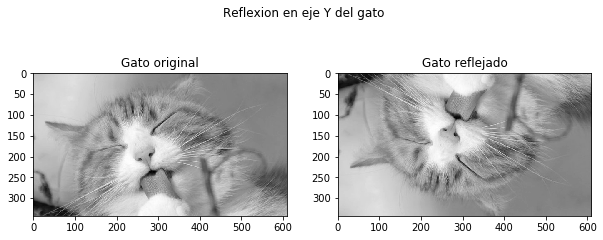

In [2]:
#Relfexion del gato en Y
gato = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
filas, columnas = gato.shape

refymatrix = np.float32([[1,0,0],[0,-1,filas]])
refy = cv2.warpAffine(gato,refymatrix,(columnas,filas))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Reflexion en eje Y del gato')
ax1.set_title('Gato original')
ax2.set_title('Gato reflejado')
ax1.imshow(gato,cmap='gray')
ax2.imshow(refy,cmap='gray');

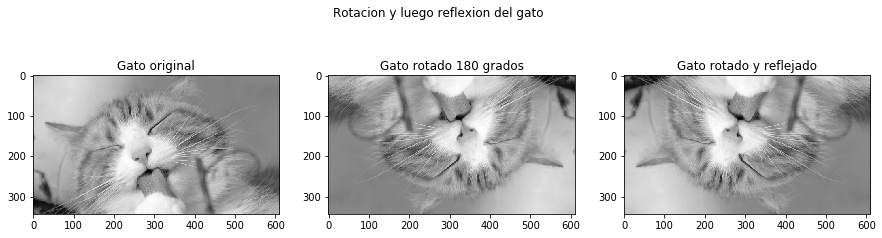

In [3]:
#Rotacion 180 grados del gato

theta = 180

#Eje de rotacion
axis = (columnas/2,filas/2)

rotmatrix = cv2.getRotationMatrix2D(axis,theta,1)

rotated = cv2.warpAffine(gato,rotmatrix,(columnas,filas))

#Reflexion del gato
xmatrix = np.float32([[-1,0,columnas],[0,1,0]])
refx = cv2.warpAffine(rotated,xmatrix,(columnas,filas))

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Rotacion y luego reflexion del gato')

ax1.set_title('Gato original')
ax2.set_title('Gato rotado 180 grados')
ax3.set_title('Gato rotado y reflejado')
ax1.imshow(gato,cmap='gray')
ax2.imshow(rotated,cmap='gray')
ax3.imshow(refx,cmap='gray');

<h3 style="text-align: left;"><span style="color: #000000;">Conlusiones:</span></h3><br>
<p>Para obtener la transformacción geométrica deseada con una reflexión directamente se realiza una reflexión del eje y.</p>
<p>Para obtener la transformación con una rotación inicialmente, se rota la imágen 180 grados y luego se rota el eje x.</p>
<p>Así que una reflexión vertical es equivalente a rotar por 180 grados y luego hacer una reflexión horizontal.</p>

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

<h1>SOLUCION</h1>

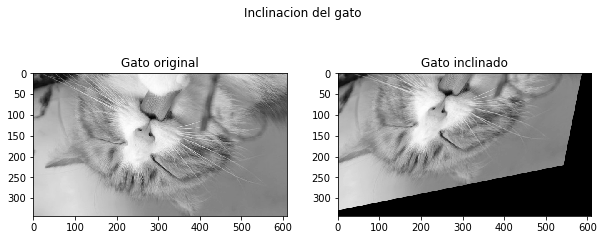

In [4]:
#Inclinacion

ix = iy = -0.2

matrix = np.float32([[1,ix,0],[iy,1,0]])

incline = cv2.warpAffine(refx,matrix,(columnas,filas))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Inclinacion del gato')
ax1.set_title('Gato original')
ax2.set_title('Gato inclinado')
ax1.imshow(refx,cmap='gray')
ax2.imshow(incline,cmap='gray');

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

<h1>SOLUCION</h1>

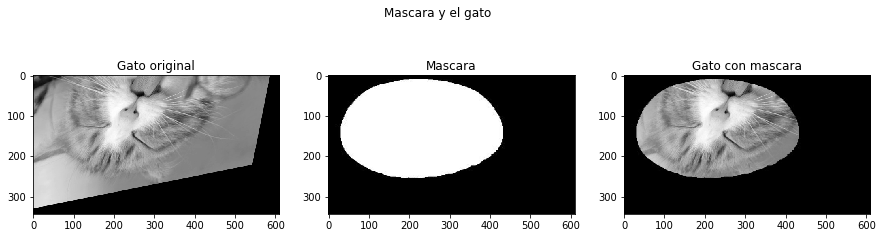

In [5]:
#Mascara a gato inclinado
mascara = cv2.imread('res/mascara2.png',cv2.IMREAD_GRAYSCALE)/255
mascara = cv2.resize(mascara,(columnas,filas))
out = incline*mascara
out = out/255

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Mascara y el gato')

ax1.set_title('Gato original')
ax2.set_title('Mascara')
ax3.set_title('Gato con mascara')
ax1.imshow(incline,cmap='gray')
ax2.imshow(mascara,cmap='gray')
ax3.imshow(out,cmap='gray');

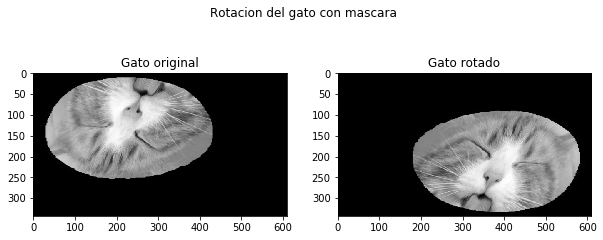

In [6]:
#rotacion 180 grados
inclinerotated = cv2.warpAffine(out,rotmatrix,(columnas,filas))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Rotacion del gato con mascara')
ax1.set_title('Gato original')
ax2.set_title('Gato rotado')
ax1.imshow(out,cmap='gray')
ax2.imshow(inclinerotated,cmap='gray');

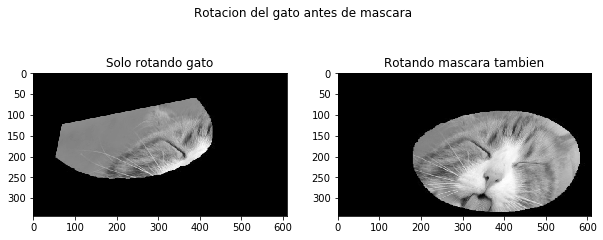

In [7]:
#rotando primero
rotatedfirst = cv2.warpAffine(incline,rotmatrix,(columnas,filas))

outr = rotatedfirst*mascara
outr = outr/255

rotatedmascara = cv2.warpAffine(mascara,rotmatrix,(columnas,filas))

outrmascara = rotatedfirst*rotatedmascara
outrmascara = outrmascara/255

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Rotacion del gato antes de mascara')
ax1.set_title('Solo rotando gato')
ax2.set_title('Rotando mascara tambien')
ax1.imshow(outr,cmap='gray')
ax2.imshow(outrmascara,cmap='gray');

<h3>Conclusiones:</h3>
<p>La inclinación nos permite simular un sentido de perspectiva, como si estuviesemos mirando una fotografía desde un ángulo inclinado.</p>
<p>Con los valores normalizados, la máscara nos determina si un pixel en esa posición toma su valor original en la imágen del gato o es asignada el valor de 0. En este caso con el gato inclinado y luego rotado coincide la máscara con la cara del gato.</p>
<p>Si se aplica la mascara a la imágen del gato después de ser rotada, la mascara dejará la misma sección revelada, así que si se aplica la máscara también rotada se obtiene el mismo resultado que haber rotado la imágen después de aplicar la máscara.</p>

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

<h1>SOLUCION</h1>

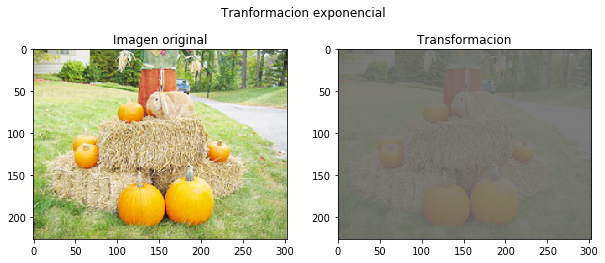

In [8]:
#Funcion exponencial

def f_onimg(img,f,args):
    
    res = np.zeros(img.shape,np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def exponential_transform(img,a,b,c):
    
    imgcopy = img.copy().astype(np.float32)/255.0
    
    res = cv2.multiply(imgcopy,b)
    res = cv2.add(res,c)
    for i in range(0,imgcopy.shape[0]):
        for j in range(0,imgcopy.shape[1]):
            res[i,j] = np.power(np.e,res[i,j])
    
    res = cv2.multiply(res,a)
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    return res

img = cv2.imread('res/calabazas.png',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

a = 0.2
b = 0.3
c = 0.6


transformed = f_onimg(img,exponential_transform,[a,b,c])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Tranformacion exponencial')
ax1.set_title('Imagen original')
ax2.set_title('Transformacion')
ax1.imshow(img)
ax2.imshow(transformed);

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

<h1>SOLUCION</h1>

C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


<Figure size 432x288 with 0 Axes>

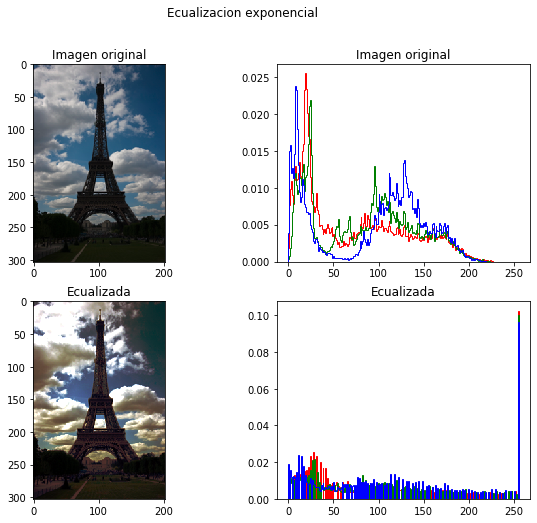

In [9]:
#Ecualizacion exponencial
def equalization_exp(img,alpha):
    
    res = np.zeros(img.shape,np.float32)
    raveled = img.ravel()
    hist_norm = plt.hist(raveled,bins=255,range=(0.0,255.0), normed=True)
    plt.clf()
    pdf = hist_norm[0]
    np.append(pdf,1.0-np.sum(pdf))
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    gmin = np.min(img)
    gmax = np.max(img)
    
    for g in range(0,256):
        res[img == g] = -gmin -(1/alpha)*np.log(1-cdf[g]+0.000001)*(gmax-gmin)
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

img = cv2.cvtColor(cv2.imread('res/eiffel.png'),cv2.COLOR_BGR2RGB)

alpha = 2

res = f_onimg(img,equalization_exp,[alpha])
colors=('r','g','b')

fig, (ax1,ax2) = plt.subplots(2,2,figsize=(10,8))
fig.suptitle('Ecualizacion exponencial')
ax1[0].set_title('Imagen original')
ax2[0].set_title('Ecualizada')
ax1[1].set_title('Imagen original')
ax2[1].set_title('Ecualizada')
ax1[0].imshow(img)
ax2[0].imshow(res)
for i, col in enumerate(colors):
    imgarray = img[:,:,i].ravel()
    ax1[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i])
for i, col in enumerate(colors):
    imgarray = res[:,:,i].ravel()
    ax2[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i]);

C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will b

<Figure size 432x288 with 0 Axes>

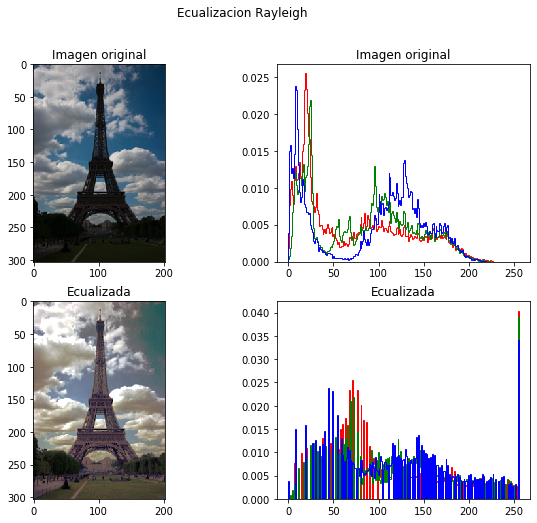

In [10]:
#Ecualizacion rayleigh
def equalization_ray(img,alpha):
    
    res = np.zeros(img.shape,np.float32)
    raveled = img.ravel()
    hist_norm = plt.hist(raveled,bins=255,range=(0.0,255.0), normed=True)
    plt.clf()
    pdf = hist_norm[0]
    np.append(pdf,1.0-np.sum(pdf))
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    gmin = np.min(img)
    gmax = np.max(img)
    
    for g in range(0,256):
        res[img == g] = gmin + np.power(-2*alpha*alpha*np.log(1-cdf[g]+0.000001),0.5)*(gmax-gmin)
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

alpha = 0.45

res = f_onimg(img,equalization_ray,[alpha])

fig, (ax1,ax2) = plt.subplots(2,2,figsize=(10,8))
fig.suptitle('Ecualizacion Rayleigh');
ax1[0].set_title('Imagen original');
ax2[0].set_title('Ecualizada');
ax1[1].set_title('Imagen original');
ax2[1].set_title('Ecualizada');
ax1[0].imshow(img);
ax2[0].imshow(res);
for i, col in enumerate(colors):
    imgarray = img[:,:,i].ravel()
    ax1[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i]);
for i, col in enumerate(colors):
    imgarray = res[:,:,i].ravel()
    ax2[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i]);

<h3>CONCLUSIONES</h3>
<p>Ambas formas para la ecualización de una imagen buscan transformar el histograma de dicha imagen para que tenga una distribución uniforme. Esto significa que busca lograr que en cada canal de un espacio de color haya la misma cantidad de pixeles sin comprometer la figura o forma que se ve en la imagen.</p>
<p>En nuestro caso estamos analizando una imagen en RGB. Como se puede observar, primeramente tenemos el histograma de la imagen sin alterar y luego el de la imagen ecualizada para ver cómo se transformara este. En ambos casos, el histograma se acható en todos sus canales debido a que la función de ecualización está tratando de nivelar la cantidad de pixeles en la imagen. Es por esto que ya no vemos tanta diferencia entre el punto máximo y el mínimo de la función en cada canal, con la ecualización se está tratando de forzar que el conteo de pixeles de un mismo color se ajuste a valores específicos en la ecualización.</p>

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.
<h1>SOLUCION</h1>

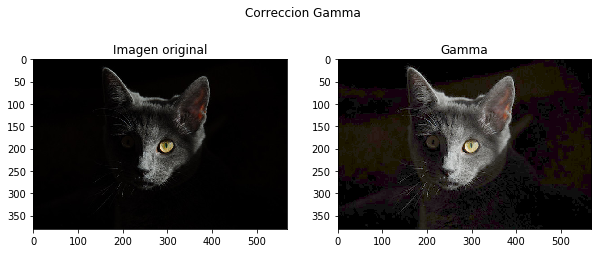

In [11]:
#Correccion gamma

def gamma_correction(img,a,gamma):
    
    imgcopy = img.copy().astype(np.float32)/255.0
    
    res = cv2.pow(imgcopy,gamma)
    res = cv2.multiply(res,a)
    
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

gatonegro = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'),cv2.COLOR_BGR2RGB)

a = 1
gamma = 0.5

gammacorrected = f_onimg(gatonegro,gamma_correction,[a,gamma])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Correccion Gamma')
ax1.set_title('Imagen original')
ax2.set_title('Gamma')
ax1.imshow(gatonegro)
ax2.imshow(gammacorrected);

<h3>CONCLUSIONES</h3>
<p>Si gamma está entre 0 y 1, en la imagen se verá cómo se realzan los claros. En cambio, sí gamma es mayor a 1, se podrá apreciar como la imagen se vuelve más negra debido a que la función ahora estaría realzando los valores oscuros.</p>
<p>Si hacemos gamma por ejemplo 0.5, se empieza apreciar el fondo y otros detalles del pelaje del gato en la imagen anterior. Por otro lado, haciendo que gamma sea mayor a 1 logramos que el fondo se oscurezca y que el cuerpo del gato se esconda en las sombras.</p>

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

<h1>SOLUCION</h1>

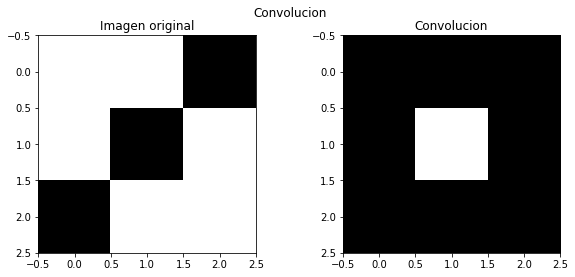

In [12]:
img = np.array([[255,255,0],
               [255,0,255],
               [0,255,255]],dtype=np.uint8)

mask = np.array([[1/2,1/2,1/2],
                [1/2,1/2,1/2],
                [1/2,1/2,1/2]],dtype=np.float64)

k = 1
res = np.zeros(img.shape,dtype=np.float64)

for i in range(-k,k+1):
    for j in range(-k,k+1):
        res[1][1] += img[1+i][1+j] * mask[k+i][k+j]

res = res.astype(np.uint8)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Convolucion')
ax1.set_title('Imagen original')
ax2.set_title('Convolucion')
ax1.imshow(img,cmap='gray')
ax2.imshow(res,cmap='gray');

<h3>CONCLUSIONES</h3>
<p>La máscara que se crea para esta solución es la que define los pesos para la suma en la convolución. La máscara siempre toma la mitad del valor de los pixeles de alrededor, sin embargo, como los pixeles alrededor del pixel (1,1)  en su mayoría valen 255, la suma se pasa de 255. Al ser convertido a un número binario en 8 bits el valor resultante es 255, es por esto que el pixel central se transforma de negro a blanco, o de un valor de 0 a 255.</p>
<p>
Como la convolución solo está siendo aplicada al pixel central, los pixeles del borde de la imagen el único cambio que experimentan es que se les asigna un valor de 0, es decir el color negro.
    </p>


## 2.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. A continuación, se muestran dos funciones para creación e implementación de kernels.

In [13]:
#Función para hacer el kernel, su parámetro es el tamaño de éste
def make_kernel(size):
    #Matriz de unos del tamaño de entrada, datos de tipo flotante
    kernel = np.ones((size,size),dtype=np.float64)
    #r corresponde al entero más grande que sea menor o igual a size/2
    r = math.floor(size/2)
    return (r,kernel/(size**2))

#Función de aplicación de kernel sobre la imagen bajo los parámetros 
#imagen de entrada, máscara, valores en x,y,kernel,r
def apply_kernel(img, res, x,y,kernel,r):
    #Recorrer la imagen en el intervalo del radio del kernel
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            #Convolución sobre cada pixel de la imagen
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

## Convolución con las funciones make_kernel y apply_kernel:
Utilizando las funciones anteriores, implemente una convolución a la imagen "res/gato.jpg" con un kernel de <b>tamaño 15x15. </b>

Explique: ¿Qué hace la función make_kernel? ¿Qué hace la función apply_kernel? ¿Por qué considera usted que los bordes se ven de color negro (adquieren valor 0)

### Debe obtener un resultado como este:

<img src = "res/convog.png">


## Convolución con Filter2D:

Utilizando la misma imagen ("res/gato.jpg"), con un kernel de <b> tamaño 15x15 </b>, realice el proceso de convolución, esta vez haga uso de la función cv2.filter2D (utilice el parámetro borderType = cv2.BORDER_REPLICATE).


### Debe obtener un resultado como este:

<img src = "res/conv.png">

# Mida la eficiencia de ambos procesos, utilizando la librería time de python.

¿Cuanto tarda cada caso de convolución implementado?
<h1>SOLUCION</h1>

In [87]:
#convolucion sobre gato
(r,kernel) = make_kernel(15)

gato = cv2.cvtColor(cv2.imread('res/gato.jpg'),cv2.COLOR_BGR2RGB)

res = np.zeros(gato.shape,dtype=np.float64)

t = time.clock()
for x in range(r,gato.shape[0]-r):
    for y in range(r,gato.shape[1]-r):
        apply_kernel(gato,res,x,y,kernel,r)
print('Done in',time.clock()-t,'seconds.')

C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Done in 392.39317158799986 seconds.


C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


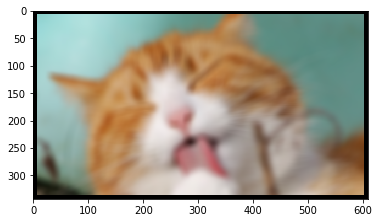

In [34]:
#mostrar la imagen
res = res.astype(np.uint8)
plt.imshow(res)

C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Time it took: 0.02395755499992447 seconds.


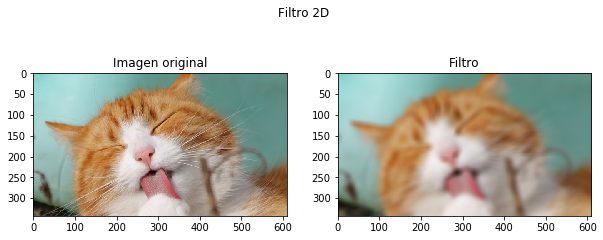

In [43]:
#Con filtro 2D
t = time.clock()
res = cv2.filter2D(gato,ddepth=-1,kernel=kernel,borderType=cv2.BORDER_REPLICATE)
print("Time it took:",time.clock()-t,"seconds.")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Filtro 2D')
ax1.set_title('Imagen original')
ax2.set_title('Filtro')
ax1.imshow(gato)
ax2.imshow(res);

<h3>CONCLUSIONES</h3>
<p>Make kernel crea la máscara de convolución y el radio. El radio es el entero menor más cercano a la mitad del tamaño del kernel. El kernel tiene valores para que tengan pesos iguales los vecinos y normalizados para conservar la integridad de la imagen. El apply kernel realiza la convolución sobre un pixel en la posición x,y. Se realiza un loop para recorrer cada pixel y realizar la convolución sobre cada uno.</p>
<p>El borde negro existe pues es imposible realizar la convolución sobre los pixeles ya que no se tiene información mas allá del borde de la imagen. En particular, los bordes tienen un tamaño igual al radio del kernel menos 1.</p>
<p>La eficiencia es indiscutiblemente mejor utilizando la función de filter2D de la librería cv2.</p>

## 3.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. En este ejercicio usted debe recrear distintos tipos de ruido que se presentan en imágenes.

El ruido es un factor que se encuentra en la mayoría de los problemas de visión artificial, utilizando las funciones de ruido Gaussiano, Pimienta y Poisson, obtenga:

<img src = "res/gatoxf.png">

A continuación se muestra la implementación de las funciones:

In [44]:
#Definir la función ruido gaussiano
def gaussian_noise(img, std):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p, amount):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy

#Definir la función ruido de Poisson
def poisson_noise(img):
    
    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    noisy = np.random.poisson(img) 
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

## Sugerencia: Ajuste los parámetros std = 50, s_vs_p =  0.5, amount = 0.05

## No olvide variar los parámetros y observar qué ocurre al hacerlo.

<h1>SOLUCION</h1>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


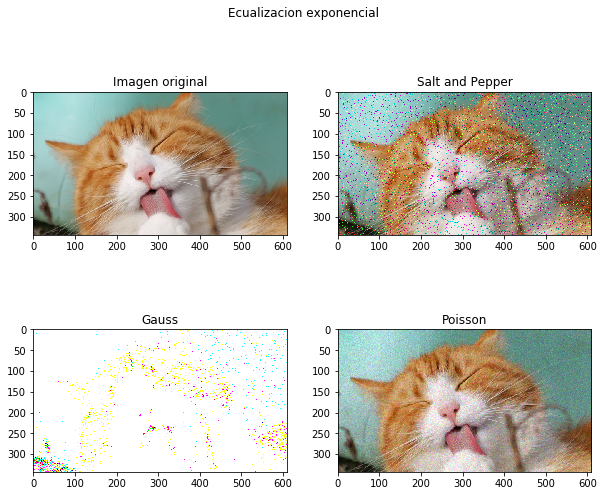

In [118]:
import warnings
warnings.filterwarnings('ignore')

#ruidos
std = 50
s_vs_p = 0.5
amount = 0.05

gauss = gaussian_noise(gato,std)
sp = sp_noise(gato,s_vs_p,amount)
poiss = poisson_noise(gato)

fig, (ax1,ax2) = plt.subplots(2,2,figsize=(10,8))
fig.suptitle('Ecualizacion exponencial')
ax1[0].set_title('Imagen original')
ax2[0].set_title('Gauss')
ax1[1].set_title('Salt and Pepper')
ax2[1].set_title('Poisson')
ax1[0].imshow(gato)
ax2[0].imshow(gauss)
ax1[1].imshow(sp)
ax2[1].imshow(poiss)

<h3>CONCLUSIONES</h3>
<p>Si se aumenta la desviación en el rudio gaussiano parece acercarse a un ruido parecido al de sal y pimienta. Presumiblemente por el comportamiento de la distribución aleatoria. </p>
<p>El ruido de poisson no parece afectar mucho la visibilidad de la imágen.</p>
<p>El amount dicta directamente que tanto la imagen sufre por el ruido de sal y pimienta.</p>

## 4.

Lea la imagen 'res/rice.png'. Aplique 100 veces sucesivas un filtro de media de 3x3 a la imagen. ¿Qué resultado obtuvo?, ¿Qué comentarios puede hacer al respecto?

Ahora aplique 100 veces un filtro de media de 11x11 a la imagen. Compare y discuta los resultados obtenidos comparados con la imagen anterior.

¿Qué ocurre si el filtro 3x3 se aplica únicamente 2 veces? ¿Qué ocurre con 10? ¿Qué pasaría si se aplica un filtro de media infinitas veces a la imagen? 

## Ayuda:

Cuando aplique 100 veces el filtro de media 3x3 debe obtener lo siguiente:

<img src = "res/scenario.png">

<h1>SOLUCION</h1>

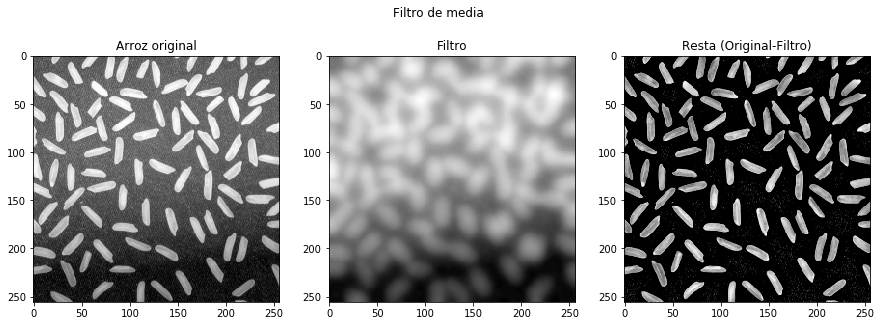

In [112]:
#filtro con arroz
rice = cv2.imread('res/rice.png',cv2.IMREAD_GRAYSCALE)

ksize = 3

kernel = np.ones((ksize,ksize),np.float64)/(ksize**2)

res = rice.copy()

for i in range(0,100):
    res = cv2.filter2D(res,ddepth=-1,kernel=kernel,borderType=cv2.BORDER_REPLICATE)

res = res.astype(np.uint8)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Filtro de media')

ax1.set_title('Arroz original')
ax2.set_title('Filtro')
ax3.set_title('Resta (Original-Filtro)')
ax1.imshow(rice,cmap='gray')
ax2.imshow(res,cmap='gray')
ax3.imshow(cv2.subtract(rice,res),cmap='gray');

<h3>CONCLUSIONES</h3>
<p>Si el kernel es de mayor tamaño, la imagen se vuelve más borrosa porque toma más pixeles para promediar. Eventualmente la imagen parece converger a un estado final donde es irrelevante la cantidad de veces que se aplica el filtro.</p>

## 5.

Utilice la función de ruido sal y pimienta (sp_noise), con s_vs_p = amount = 0.7.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", introduzcala en la función de ruido pimienta y posteriomente, aplique un filtro de mediana con kernel de tamaño 7x7.

<img src = "res/filter.png">

C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


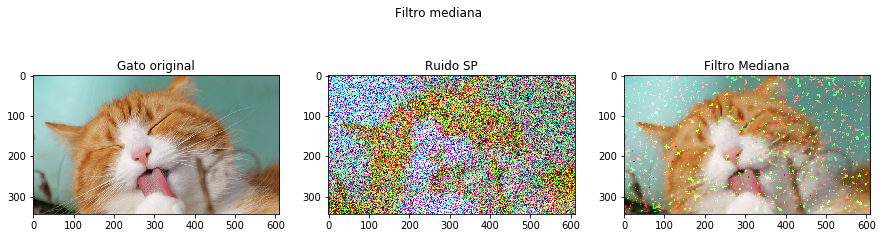

In [84]:
#filtro mediana
sp = sp_noise(gato,s_vs_p = 0.7,amount=0.7)

ksize = 7

res = cv2.medianBlur(sp,ksize)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Filtro mediana')

ax1.set_title('Gato original')
ax2.set_title('Ruido SP')
ax3.set_title('Filtro Mediana')
ax1.imshow(gato)
ax2.imshow(sp)
ax3.imshow(res);

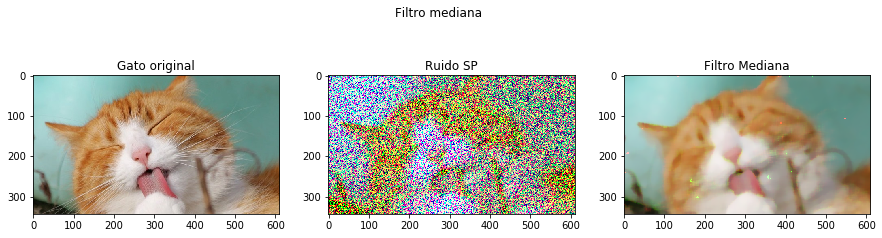

In [85]:
ksize = 15

res = cv2.medianBlur(sp,ksize)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Filtro mediana')

ax1.set_title('Gato original')
ax2.set_title('Ruido SP')
ax3.set_title('Filtro Mediana')
ax1.imshow(gato)
ax2.imshow(sp)
ax3.imshow(res);

<h3>CONCLUSIONES</h3>
<p>Como es de esperarse, el filtro de mediana arregla el ruido de sal y pimienta en cierta medida. Aplicar el filtro con un mayor tamaño de kernel arregla más el ruido pero se vuelven aparentes los defectos del filtro de medias como la pérdida de detalles en el objeto de la imagen.</p>